In [1]:
import os
from dotenv import load_dotenv
from statsbombpy import sb
import pandas as pd
# Load environment variables from .env file (if it exists)
load_dotenv()

# Set credentials if available
username = os.getenv('SB_USERNAME')
password = os.getenv('SB_PASSWORD')

if username and password:
    print("Credentials loaded successfully")
else:
    print("No credentials found - using open data access only")

Credentials loaded successfully


In [3]:
season_stats = sb.player_season_stats(competition_id=73, season_id=317)

print(season_stats.columns.tolist())


['account_id', 'player_id', 'player_name', 'team_id', 'team_name', 'competition_id', 'competition_name', 'season_id', 'season_name', 'country_id', 'birth_date', 'player_female', 'player_first_name', 'player_last_name', 'player_known_name', 'player_weight', 'player_height', 'player_season_minutes', 'player_season_np_xg_per_shot', 'player_season_np_xg_90', 'player_season_np_shots_90', 'player_season_goals_90', 'player_season_npga_90', 'player_season_xa_90', 'player_season_key_passes_90', 'player_season_op_key_passes_90', 'player_season_assists_90', 'player_season_through_balls_90', 'player_season_passes_into_box_90', 'player_season_op_passes_into_box_90', 'player_season_touches_inside_box_90', 'player_season_op_passes_into_and_touches_inside_box_90', 'player_season_tackles_90', 'player_season_interceptions_90', 'player_season_tackles_and_interceptions_90', 'player_season_padj_tackles_90', 'player_season_padj_interceptions_90', 'player_season_padj_tackles_and_interceptions_90', 'player_se

In [9]:
striker_filter = (
    (season_stats['primary_position'] == 'Centre Forward') | 
    (season_stats['secondary_position'] == 'Centre Forward')
)

striker_stats = season_stats[striker_filter].copy()

# 1️⃣  Filter by minutes
striker_stats_filtered = striker_stats[striker_stats["player_season_minutes"] >= 500].copy()

striker_stats_filtered


,account_id,player_id,player_name,team_id,team_name,competition_id,competition_name,season_id,season_name,country_id,...,player_season_fhalf_lbp_to_space_10_90,player_season_f3_lbp_to_space_10_90,player_season_lbp_to_space_2_90,player_season_fhalf_lbp_to_space_2_90,player_season_f3_lbp_to_space_2_90,player_season_lbp_to_space_5_90,player_season_fhalf_lbp_to_space_5_90,player_season_f3_lbp_to_space_5_90,player_season_360_minutes,player_season_defensive_actions_90
12,41100,17299,Brandon Vázquez Toledo,1222,Monterrey,73,Liga MX,317,2024/2025,241,...,0.000000,0.000000,0.437557,0.328168,0.109389,0.109389,0.000000,0.000000,822.75000,15.533274
15,41100,30452,Samuel Alejandro Sosa Cordero,1228,Querétaro,73,Liga MX,317,2024/2025,246,...,0.123896,0.123896,0.619479,0.495583,0.371688,0.371688,0.247792,0.123896,726.41670,15.115292
16,41100,11162,Jhonder Leonel Cádiz Fernández,1302,León,73,Liga MX,317,2024/2025,246,...,0.072247,0.000000,0.469603,0.361233,0.108370,0.288986,0.180617,0.000000,2491.46630,12.896021
17,41100,4041,José Salomón Rondón Giménez,1298,Pachuca,73,Liga MX,317,2024/2025,246,...,0.029943,0.000000,0.988106,0.778508,0.449139,0.269483,0.179656,0.029943,3005.74980,17.726027
20,41100,7578,Anthony Rubén Lozano Colón,1299,Santos Laguna,73,Liga MX,317,2024/2025,101,...,0.000000,0.000000,0.324266,0.259413,0.000000,0.194560,0.194560,0.000000,1387.74990,20.753020
21,41100,23846,Uroš Đurđević,1296,Atlas,73,Liga MX,317,2024/2025,152,...,0.000000,0.000000,0.276196,0.230163,0.184131,0.000000,0.000000,0.000000,1955.13340,16.709856
26,41100,29702,Franck Boli,1287,Atlético San Luis,73,Liga MX,317,2024/2025,55,...,0.000000,0.000000,0.297139,0.198092,0.099046,0.000000,0.000000,0.000000,908.66670,12.380777
28,41100,44747,Adonis Stalin Preciado Quintero,1228,Querétaro,73,Liga MX,317,2024/2025,65,...,0.000000,0.000000,0.924850,0.858789,0.594546,0.264243,0.264243,0.132121,1362.38330,14.797598
43,41100,20041,André-Pierre Gignac,1300,Tigres UANL,73,Liga MX,317,2024/2025,78,...,0.064904,0.000000,0.843750,0.649038,0.454327,0.259615,0.129808,0.000000,1386.66660,12.461539
47,41100,18784,João Paulo Dias Fernandes,1227,Toluca,73,Liga MX,317,2024/2025,183,...,0.000000,0.000000,0.833255,0.606004,0.252502,0.328252,0.252502,0.075750,3564.33350,14.922847


In [22]:
from sklearn.preprocessing import StandardScaler


# 2️⃣  Select the relevant features
features = [
    # --- Finishing ---
    "player_season_np_xg_90", "player_season_np_shots_90", "player_season_np_xg_per_shot",
    "player_season_npg_90", "player_season_conversion_ratio", "player_season_shot_on_target_ratio",
    "player_season_shot_touch_ratio", "player_season_over_under_performance_90",
    # --- Chance creation & link play ---
    "player_season_xa_90", "player_season_op_xa_90", "player_season_sp_xa_90",
    "player_season_assists_90", "player_season_op_assists_90", "player_season_key_passes_90",
    "player_season_op_key_passes_90", "player_season_through_balls_90",
    "player_season_passes_into_box_90", "player_season_op_passes_into_box_90",
    "player_season_sp_passes_into_box_90", "player_season_passing_ratio",
    "player_season_pass_into_danger_ratio", "player_season_pass_length",
    # --- Carrying & dribbling ---
    "player_season_dribbles_90", "player_season_failed_dribbles_90", "player_season_carries_90",
    "player_season_carry_ratio", "player_season_carry_length", "player_season_dispossessions_90",
    "player_season_turnovers_90", "player_season_touches_inside_box_90",
    # --- OBV ---
    "player_season_obv_90", "player_season_obv_pass_90", "player_season_obv_shot_90",
    "player_season_obv_dribble_carry_90",
    # --- Space & movement (360°) ---
    "player_season_average_space_received_in", "player_season_average_f3_space_received_in",
    "player_season_f3_ball_receipts_in_space_2_ratio", "player_season_f3_ball_receipts_in_space_5_ratio",
    "player_season_lbp_90", "player_season_lbp_completed_90", "player_season_lbp_ratio",
    "player_season_f3_lbp_90", "player_season_f3_lbp_completed_90", "player_season_f3_lbp_ratio",
    "player_season_lbp_received_90", "player_season_f3_lbp_received_90",
    # --- Pressing intensity ---
    "player_season_pressures_90", "player_season_fhalf_pressures_90", "player_season_fhalf_pressures_ratio",
    "player_season_pressure_regains_90", "player_season_counterpressures_90",
    "player_season_counterpressure_regains_90", "player_season_aggressive_actions_90"
]

striker_features = striker_stats_filtered[features].copy()

# 3️⃣  Drop high-NaN columns
nan_threshold = 0.4
valid_cols = striker_features.columns[striker_features.isna().mean() <= nan_threshold]
striker_features = striker_features[valid_cols]

# 4️⃣  Impute remaining NaN with median
striker_features = striker_features.apply(lambda s: s.fillna(s.median()), axis=0)

# 5️⃣  Drop zero-variance columns
zero_var = striker_features.std() == 0
striker_features = striker_features.loc[:, ~zero_var]

# 6️⃣  Standardize
scaler = StandardScaler()
striker_features_scaled = scaler.fit_transform(striker_features)

# 7️⃣  Convert back to DataFrame for clarity
striker_features_scaled_df = pd.DataFrame(striker_features_scaled, columns=striker_features.columns, index=striker_stats_filtered.index)

print(f"✅ Ready for PCA with {striker_features_scaled_df.shape[1]} features and {striker_features_scaled_df.shape[0]} strikers.")



✅ Ready for PCA with 53 features and 53 strikers.


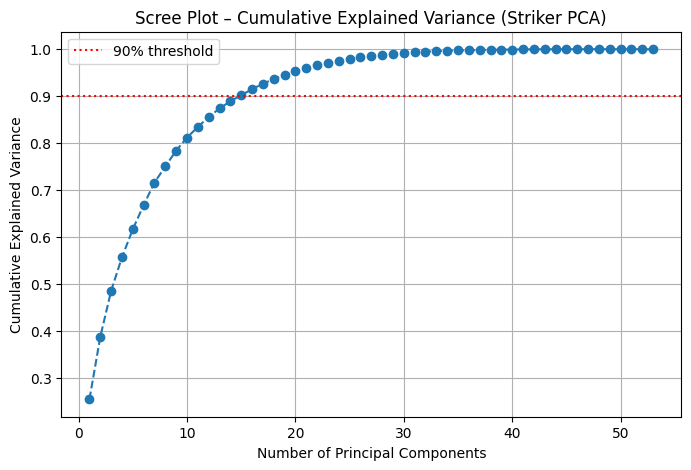

PC1: 0.254
PC2: 0.387
PC3: 0.485
PC4: 0.557
PC5: 0.617
PC6: 0.668
PC7: 0.716
PC8: 0.750
PC9: 0.784
PC10: 0.812
PC11: 0.834
PC12: 0.856
PC13: 0.874
PC14: 0.889
PC15: 0.902


In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on the standardized striker features
pca = PCA()
X_pca = pca.fit_transform(striker_features_scaled_df)

# Explained variance per component
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# === Scree plot ===
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), cum_var, marker='o', linestyle='--', color='tab:blue')
plt.title("Scree Plot – Cumulative Explained Variance (Striker PCA)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(0.90, color='red', linestyle=':', label='90% threshold')
plt.grid(True)
plt.legend()
plt.show()

# Print the first 15 components' cumulative variance
for i, var in enumerate(cum_var[:15], 1):
    print(f"PC{i}: {var:.3f}")


In [25]:
from sklearn.preprocessing import normalize
import pandas as pd

# keep first 8 components
n_pcs = 8
X_pca_reduced = X_pca[:, :n_pcs]

# L2-normalize for cosine clustering
X_pca_normalized = normalize(X_pca_reduced, norm='l2')

striker_pca_df = pd.DataFrame(
    X_pca_normalized,
    columns=[f"PC{i+1}" for i in range(n_pcs)],
    index=striker_stats_filtered.index
)

print(striker_pca_df.head())


         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
12 -0.028725  0.594375 -0.183412  0.608877  0.243909 -0.413614  0.088017   
15  0.630146 -0.447966 -0.171563 -0.245497 -0.084994 -0.417058  0.187036   
16 -0.453424  0.525249 -0.462620 -0.032998 -0.143701  0.105641 -0.358696   
17  0.452664  0.817559  0.248726  0.080381  0.021252  0.113795 -0.202057   
20 -0.695310 -0.577492 -0.334448  0.078086  0.119230 -0.023021 -0.206374   

         PC8  
12  0.056626  
15  0.310477  
16  0.378075  
17 -0.064331  
20  0.088082  


In [27]:
# Loadings matrix: features x components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=striker_features_scaled_df.columns
)

# View top contributing features for each of the first few PCs
for i in range(8):
    print(f"\nTop 5 features for PC{i+1}:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(5))



Top 5 features for PC1:
player_season_lbp_completed_90       0.234400
player_season_carries_90             0.232734
player_season_passes_into_box_90     0.230964
player_season_lbp_90                 0.226090
player_season_f3_lbp_completed_90    0.223008
Name: PC1, dtype: float64

Top 5 features for PC2:
player_season_touches_inside_box_90    0.260942
player_season_npg_90                   0.249399
player_season_f3_lbp_received_90       0.239232
player_season_np_xg_90                 0.234522
player_season_op_xa_90                 0.229152
Name: PC2, dtype: float64

Top 5 features for PC3:
player_season_pressures_90             0.299926
player_season_pressure_regains_90      0.283857
player_season_fhalf_pressures_90       0.281369
player_season_counterpressures_90      0.274590
player_season_aggressive_actions_90    0.272470
Name: PC3, dtype: float64

Top 5 features for PC4:
player_season_obv_90          0.343691
player_season_turnovers_90    0.287735
player_season_obv_shot_90     0.27

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

scores = []

# test cluster counts 2–10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_pca_normalized)
    
    sil = silhouette_score(X_pca_normalized, labels, metric='cosine')
    db = davies_bouldin_score(X_pca_normalized, labels)
    scores.append((k, sil, db))

# print results
print("k | silhouette | davies-bouldin")
for k, sil, db in scores:
    print(f"{k:2d} | {sil:10.3f} | {db:10.3f}")


k | silhouette | davies-bouldin
 2 |      0.293 |      1.928
 3 |      0.286 |      1.819
 4 |      0.282 |      1.733
 5 |      0.233 |      1.753
 6 |      0.236 |      1.745
 7 |      0.233 |      1.606
 8 |      0.267 |      1.524
 9 |      0.283 |      1.519
10 |      0.262 |      1.364


In [43]:
from sklearn.mixture import GaussianMixture
import pandas as pd

n_clusters = 3  # keep same interpretability
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
gmm.fit(X_pca_normalized)

# hard cluster assignment
cluster_labels = gmm.predict(X_pca_normalized)

# soft probabilities
cluster_probs = gmm.predict_proba(X_pca_normalized)

# attach to df
proba_cols = [f"cluster_{i}_prob" for i in range(n_clusters)]
striker_stats_filtered[["cluster"] + proba_cols] = pd.concat(
    [pd.Series(cluster_labels, name="cluster"),
     pd.DataFrame(cluster_probs, columns=proba_cols, index=striker_stats_filtered.index)],
    axis=1
)

striker_stats_filtered.head()


,account_id,player_id,player_name,team_id,team_name,competition_id,competition_name,season_id,season_name,country_id,...,player_season_lbp_to_space_5_90,player_season_fhalf_lbp_to_space_5_90,player_season_f3_lbp_to_space_5_90,player_season_360_minutes,player_season_defensive_actions_90,cluster,cluster_0_prob,cluster_1_prob,cluster_2_prob,cluster_3_prob
12,41100,17299,Brandon Vázquez Toledo,1222,Monterrey,73,Liga MX,317,2024/2025,241,...,0.109389,0.000000,0.000000,822.7500,15.533274,1.0,6.542851e-05,4.959017e-16,9.999346e-01,7.903851e-23
15,41100,30452,Samuel Alejandro Sosa Cordero,1228,Querétaro,73,Liga MX,317,2024/2025,246,...,0.371688,0.247792,0.123896,726.4167,15.115292,1.0,1.398280e-18,1.000000e+00,5.305569e-12,3.265249e-17
16,41100,11162,Jhonder Leonel Cádiz Fernández,1302,León,73,Liga MX,317,2024/2025,246,...,0.288986,0.180617,0.000000,2491.4663,12.896021,2.0,1.185683e-04,3.181580e-18,9.998814e-01,3.353753e-09
17,41100,4041,José Salomón Rondón Giménez,1298,Pachuca,73,Liga MX,317,2024/2025,246,...,0.269483,0.179656,0.029943,3005.7498,17.726027,1.0,2.299558e-13,1.959740e-08,1.000000e+00,2.995977e-24
20,41100,7578,Anthony Rubén Lozano Colón,1299,Santos Laguna,73,Liga MX,317,2024/2025,101,...,0.194560,0.194560,0.000000,1387.7499,20.753020,0.0,9.999943e-01,5.665204e-06,9.648090e-09,1.000000e+00


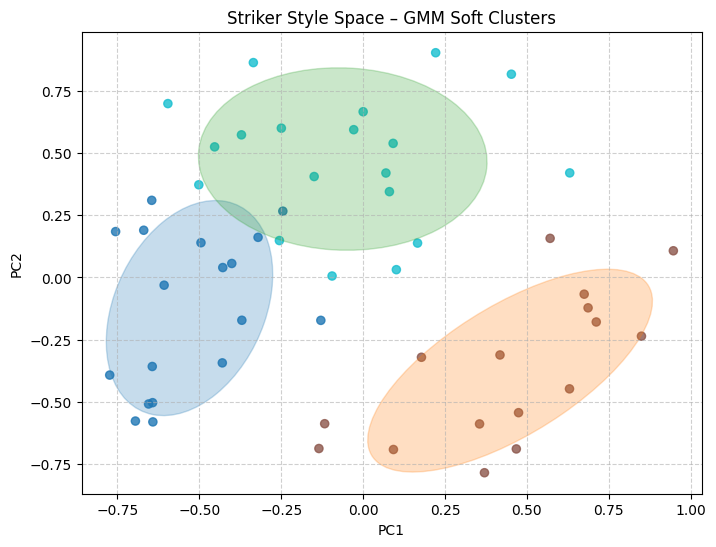

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

def plot_gmm_clusters(X, gmm, labels, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6))

    # scatter: color by dominant cluster
    ax.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=35, alpha=0.8)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Striker Style Space – GMM Soft Clusters")

    # draw Gaussian ellipses for cluster covariances
    for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
        # project covariance to first two PCs
        sub_cov = cov[:2, :2]
        v, w = np.linalg.eigh(sub_cov)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.degrees(np.arctan2(u[1], u[0]))

        # ✅ updated syntax: specify xy=
        ell = Ellipse(
            xy=mean[:2],
            width=v[0],
            height=v[1],
            angle=180+angle,
            color=f"C{i}",
            alpha=0.25
        )
        ax.add_patch(ell)

    plt.grid(True, linestyle="--", alpha=0.6)
    return ax

plot_gmm_clusters(X_pca_normalized, gmm, cluster_labels)
plt.show()


In [36]:
print(gmm.means_.shape, gmm.covariances_.shape)


(4, 8) (4, 8, 8)


In [45]:
import pandas as pd

# number of players per cluster
cluster_counts = striker_stats_filtered["cluster"].value_counts().sort_index()
display(cluster_counts)

# average soft membership (confidence per cluster)
proba_cols = [c for c in striker_stats_filtered.columns if c.startswith("cluster_")]
avg_confidence = striker_stats_filtered[proba_cols].max(axis=1).mean().round(3)
print(f"Average cluster confidence: {avg_confidence}")


cluster
0.0    3
1.0    4
2.0    4
Name: count, dtype: int64

Average cluster confidence: 0.999


In [46]:
import numpy as np
np.round(gmm.weights_, 3)

array([0.342, 0.302, 0.357])

In [47]:
# check cluster 2 probabilities (average across all players)
proba_cols = [c for c in striker_stats_filtered.columns if c.startswith("cluster_")]
print("Mean membership per cluster:")
print(striker_stats_filtered[proba_cols].mean().round(3))


Mean membership per cluster:
cluster_0_prob    0.342
cluster_1_prob    0.302
cluster_2_prob    0.356
cluster_3_prob    0.321
dtype: float64


In [48]:
key_feats = [
    "player_season_np_xg_90", "player_season_xa_90",
    "player_season_passes_into_box_90", "player_season_carries_90",
    "player_season_pressures_90", "player_season_touches_inside_box_90"
]
display(striker_stats_filtered.groupby("cluster")[key_feats].mean().round(2))


,player_season_np_xg_90,player_season_xa_90,player_season_passes_into_box_90,player_season_carries_90,player_season_pressures_90,player_season_touches_inside_box_90
cluster,,,,,,
0.0,0.23,0.07,0.29,18.59,16.93,3.67
1.0,0.29,0.11,0.66,16.77,14.61,5.43
2.0,0.43,0.08,0.31,15.65,11.73,6.68
